Exploratory Data Analysis necessary insights: 
- Number of Users. 
- Hist Left/Right score
- Number of posts
- Users No of Posts Histogram
- When posted Histogram
- Post length
- Post length by party affiliation 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import tokenize_post
from scipy import stats


Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
dev= True

In [3]:
if dev:
    data = pd.read_csv('reduced_data2014_15_full.csv', nrows=1000)
    users_affiliation_df = pd.read_csv('BREXIT_user_affiliation.csv',nrows=1000)
    users_n_posts_df.read_csv('users_n_posts.csv', nrows=1000)
else:
    data = pd.read_csv('BREXIT_reduced_data.csv')
    users_affiliation_df = pd.read_csv('BREXIT_user_affiliation.csv')
    users_n_posts_df.read_csv('users_n_posts.csv')

In [4]:
#Number of users
print('unique users: {}'.format(len(np.unique(data['author']))))
print('Number of posts: {}'.format(len(data)))

unique users: 409
Number of posts: 1000


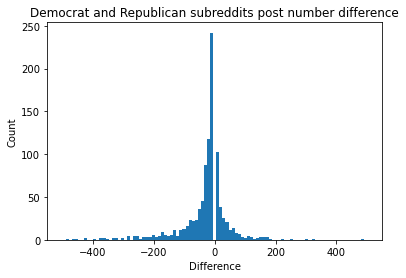

In [5]:
#Left-right score Histogram 
plt.hist(users_affiliation_df['score'], bins= np.linspace(-500,500, 100))
plt.title('Democrat and Republican subreddits post number difference')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.savefig('data/figures\histogram_affiliation_score.pdf', dpi = 300)
plt.show()

In [6]:
#Number of Posts by User histogram
plt.hist(users_n_posts_df['n_posts'], bins= np.linspace(-500,500, 100))
plt.xlabel('Number of posts per user')
plt.xlabel('N Users')
plt.savefig('data\figures\histogram_user_post_number.pdf', dpi = 300)
plt.show()

NameError: name 'users_n_posts_df' is not defined

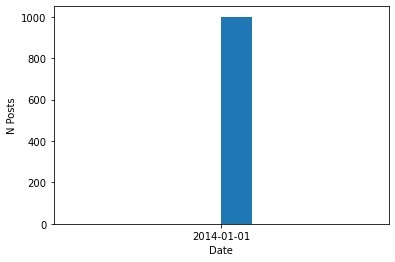

In [7]:
#When posted
plt.hist(data['time'])
plt.ylabel('N Posts')
plt.xlabel('Date')
plt.savefig('data\figures\histogram_when_posted.pdf', dpi = 300)
plt.show()

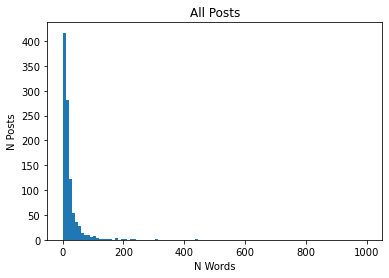

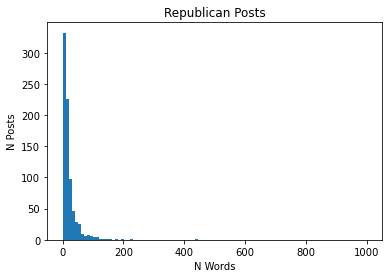

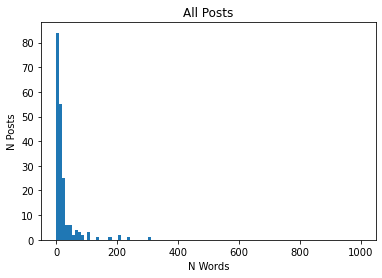

With p = 0.2579324853874435 the post length between republicans and democrats differ.


In [9]:
#Post lengths
data['length'] = [len(tokenize_post(post)) for post in data['post']]

plt.hist(data['length'], bins =np.linspace(0,1000, 100))
plt.ylabel('N Posts')
plt.xlabel('N Words')
plt.title('All Posts')
plt.savefig('data\figures\histogram_n_words.pdf', dpi = 300)
plt.show()

plt.hist(data[data['politics'] == 'R']['length'], bins =np.linspace(0,1000, 100))
plt.ylabel('N Posts')
plt.xlabel('N Words')
plt.title('Republican Posts')
plt.savefig('data\figures\histogram_rep_n_words.pdf', dpi = 300)
plt.show()

plt.hist(data[data['politics'] == 'D']['length'], bins =np.linspace(0,1000, 100))
plt.ylabel('N Posts')
plt.xlabel('N Words')
plt.title('All Posts')
plt.savefig('data\figures\histogram_dem_n_words.pdf', dpi = 300)
plt.show()


t_value,p_value=stats.ttest_ind(data[data['politics'] == 'D'].length.values,
                                data[data['politics'] == 'R'].length.values)

print('With p = {} the post length between republicans and democrats differ.'.format(p_value))